In [1]:
import pandas as pd
import matplotlib.pyplot as plt

logs = # TO FILL
graph_dir = f"{logs}/graphs/accuracy"
processed_log_dir = f"{logs}/resultats_11-23_processed"
log_dir = f"{logs}/resultats_11-23/"
save_dir = f"{processed_log_dir}/unet/"
path = f"{log_dir}/unet/"

job_file = save_dir+"/summary.csv"
energy_file = save_dir+"/energy.csv"
jobs = pd.read_csv(job_file).drop(columns=["Unnamed: 0"])

In [2]:
jobs.columns

Index(['job', 'energy_kWh', 'energy_joule',
       'energy_consumption_since_previous_measurement_milliJ', 'job_id',
       'file', 'sub_seed', 'srun_start_time_ms', 'start_time_ms',
       'end_time_ms', 'epoch_nb', 'block_nb', 'eval_nb', 'mllog_cache_clear',
       'mllog_submission_benchmark', 'mllog_submission_org',
       'mllog_submission_division', 'mllog_submission_status',
       'mllog_submission_platform', 'mllog_seed', 'mllog_opt_name',
       'mllog_opt_base_learning_rate', 'mllog_opt_learning_rate_warmup_epochs',
       'mllog_opt_learning_rate_decay_boundary_epochs',
       'mllog_opt_learning_rate_decay_factor', 'mllog_opt_weight_decay',
       'mllog_opt_momentum', 'mllog_oversampling',
       'mllog_training_input_shape', 'mllog_validation_input_shape',
       'mllog_validation_overlap', 'mllog_train_samples', 'mllog_eval_samples',
       'mllog_global_batch_size', 'mllog_gradient_accumulation_steps',
       'mllog_samples_per_epoch', 'mllog_throughput', 'mllog_curren

In [3]:
cols = [x for x in jobs.columns if jobs[x].dtype != "object"]
pd.set_option('display.max_colwidth', 15)
pd.set_option('display.max_rows', 67)
jobs[cols].style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,job_id,sub_seed,srun_start_time_ms,start_time_ms,end_time_ms,epoch_nb,block_nb,eval_nb,mllog_cache_clear,mllog_seed,mllog_opt_base_learning_rate,mllog_opt_learning_rate_warmup_epochs,mllog_opt_learning_rate_decay_factor,mllog_opt_weight_decay,mllog_opt_momentum,mllog_oversampling,mllog_validation_overlap,mllog_train_samples,mllog_eval_samples,mllog_global_batch_size,mllog_gradient_accumulation_steps,mllog_samples_per_epoch,mllog_throughput,mllog_current_lr,mllog_eval_start,mllog_eval_accuracy,mllog_eval_stop,node_nb
0,126519,1.374431,4947951.797741,4947951797.740845,126519,51,1699371575000.000000,1699371577000.000000,1699373086000.000000,0,108,58,True,4152261573,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.379499,2.000000,2140,0.908121,2140,1
1,126520,1.156910,4164876.886835,4164876886.835327,126520,51,1699385535000.000000,1699385537000.000000,1699386812000.000000,0,92,42,True,3649084880,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.992958,2.000000,1820,0.909951,1820,1
2,126521,2.430510,8749834.669126,8749834669.126465,126521,6,1699386922000.000000,1699386924000.000000,1699389571000.000000,0,185,135,True,1691357003,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.610425,2.000000,3680,0.908259,3680,1
3,126522,1.414264,5091349.332854,5091349332.853882,126522,42,1699389681000.000000,1699389683000.000000,1699391236000.000000,0,111,61,True,278066476,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.073176,2.000000,2200,0.910363,2200,1
4,126523,0.987955,3556639.350019,3556639350.018555,126523,7,1699391344000.000000,1699391346000.000000,1699392438000.000000,0,80,30,True,322733884,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.321887,2.000000,1580,0.908727,1580,1
5,126524,2.927496,10538985.410739,10538985410.738647,126524,51,1699392549000.000000,1699392551000.000000,1699395734000.000000,0,221,171,True,2763906414,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.652537,2.000000,4400,0.908810,4400,1
6,126525,1.276600,4595761.234668,4595761234.668457,126525,6,1699395842000.000000,1699395844000.000000,1699397247000.000000,0,101,51,True,1945544833,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.354632,2.000000,2000,0.908962,2000,1
7,126526,1.551573,5585661.882359,5585661882.359009,126526,42,1699397358000.000000,1699397360000.000000,1699399060000.000000,0,121,71,True,2125369235,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.760104,2.000000,2400,0.908828,2400,1
8,126527,2.156179,7762243.530823,7762243530.822876,126527,7,1699399169000.000000,1699399171000.000000,1699401522000.000000,0,165,115,True,4087178635,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.802989,2.000000,3280,0.911245,3280,1
9,126528,1.758403,6330252.147118,6330252147.117920,126528,51,1699401633000.000000,1699401635000.000000,1699403557000.000000,0,136,86,True,1959808859,2.000000,1000,1.000000,0.000000,0.900000,0.400000,0.500000,168,42,56,1,168,291.209780,2.000000,2700,0.908345,2700,1


# Conducted experiments

In [4]:
gp_by = ["node_nb", "sub_seed"]
jobs[gp_by+["job_id"]].groupby(gp_by).count()["job_id"]

node_nb  sub_seed
1        6           3
         7           3
         42          3
         51          4
Name: job_id, dtype: int64

# Preprocessing

In [5]:

# Computing the total number of images processed, which seems like the most relevant metric regarding energy consumption
# jobs["total_batch_size"]=jobs["mllog_d_batch_size"]*jobs["node_nb"]*8
jobs["images_processed"] = jobs["block_nb"]*jobs["mllog_global_batch_size"]

# Result exploration

In [6]:
(jobs["energy_kWh"].max() - jobs["energy_kWh"].min())/jobs["energy_kWh"].max() # grosse différence entre les expériences...

0.6814154513458056

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

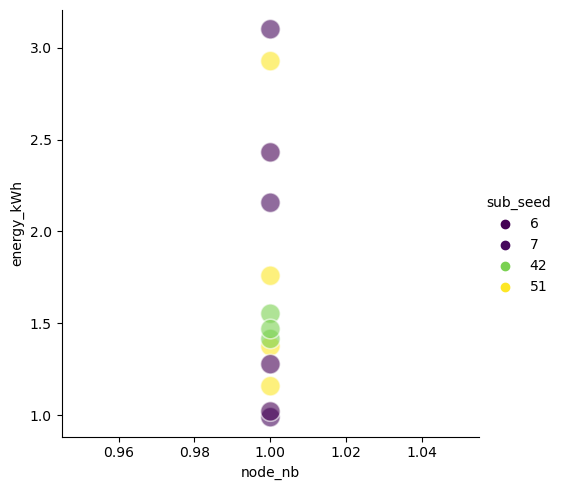

In [9]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="energy_kWh", hue="sub_seed", s=200, alpha=0.6, palette="viridis"
)

# Execution time

In [10]:
jobs["duration(minutes)"] = (jobs["end_time_ms"] - jobs["start_time_ms"])/60000

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


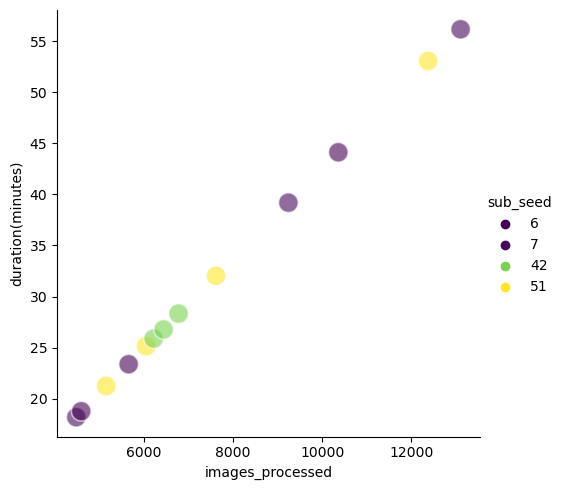

In [11]:
sns.relplot(
    data=jobs,
    x="images_processed", y="duration(minutes)", hue="sub_seed", s=200, alpha=0.6, palette="viridis"
)

### MLLOG details



In [9]:
plot_df = jobs[(jobs["job"]==111797)]

In [ ]:

file = plot_df.file.values[0]
file.split("/")[-2:]

log_file = path + "/".join(file.split("/")[-2:])
print(log_file)

import sys
sys.path.append("../../../logging/mlperf_logging/")
from compliance_checker.mlp_parser import parse_file

loglines, _ = parse_file(log_file, ruleset="2.1.0")
mllog = pd.DataFrame(loglines)
mllog

/Users/mathildepro/Documents/code_projects/hpe_logs/resultats-17-07-23/bert/111768/230714085307566283597_1.log


,full_string,timestamp,key,value,lineno
0,":::MLLOG {""namespace"": """", ""time_ms"": 16893176...",1.689318e+12,init_start,"{'value': None, 'metadata': {'file': '/workspa...",0
1,":::MLLOG {""namespace"": """", ""time_ms"": 16893176...",1.689318e+12,init_start,"{'value': None, 'metadata': {'file': '/workspa...",1
2,":::MLLOG {""namespace"": """", ""time_ms"": 16893176...",1.689318e+12,init_start,"{'value': None, 'metadata': {'file': '/workspa...",2
3,":::MLLOG {""namespace"": """", ""time_ms"": 16893176...",1.689318e+12,init_start,"{'value': None, 'metadata': {'file': '/workspa...",3
4,":::MLLOG {""namespace"": """", ""time_ms"": 16893176...",1.689318e+12,init_start,"{'value': None, 'metadata': {'file': '/workspa...",4
...,...,...,...,...,...
6098,":::MLLOG {""namespace"": """", ""time_ms"": 16893182...",1.689318e+12,block_stop,"{'value': None, 'metadata': {'file': '/workspa...",6098
6099,":::MLLOG {""namespace"": """", ""time_ms"": 16893182...",1.689318e+12,epoch_stop,"{'value': None, 'metadata': {'file': '/workspa...",6099
6100,":::MLLOG {""namespace"": """", ""time_ms"": 16893182...",1.689318e+12,train_samples,"{'value': 4963840, 'metadata': {'file': '/work...",6100
6101,":::MLLOG {""namespace"": """", ""time_ms"": 16893182...",1.689318e+12,eval_samples,"{'value': 10000, 'metadata': {'file': '/worksp...",6101


In [ ]:
def get_block_duration(log_file):
    loglines, _ = parse_file(log_file, ruleset="2.1.0")
    mllog = pd.DataFrame(loglines)
    training_start = mllog[mllog["key"]=="block_start"].sort_values("timestamp").timestamp.values[0]
    training_end = mllog[mllog["key"]=="block_stop"].sort_values("timestamp").timestamp.values[-1]
    duration_block_ms = training_end - training_start
    return duration_block_ms/60000

jobs["duration_block_minutes"] = jobs.apply(lambda x: get_block_duration(path + "/".join(x.file.split("/")[-2:])), axis=1)

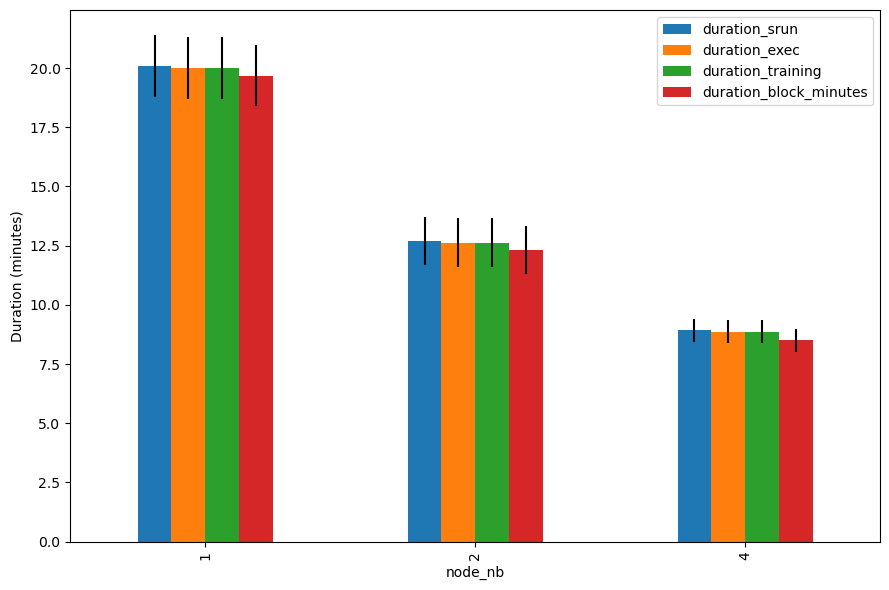

In [ ]:
plot_df = jobs[(jobs["sub_target-acc"]==0.72)&(jobs["sub_num-sample"]==14000000)]
fig, ax = plt.subplots(figsize=(9,6))
les_y = ["duration_srun", "duration_exec", "duration_training", "duration_block_minutes"]
group = plot_df.groupby("node_nb")[les_y]
group.mean().plot(
    ax=ax,
    # x="node_nb", 
    y=les_y,
    yerr=group.std()[les_y],
    kind="bar"
    )
ax.set_ylabel("Duration (minutes)")
plt.tight_layout()

duration_diff    0.390281
dtype: float64


/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_44703/1256089175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["duration_diff"] = plot_df["duration_srun"] - plot_df["duration_block_minutes"]


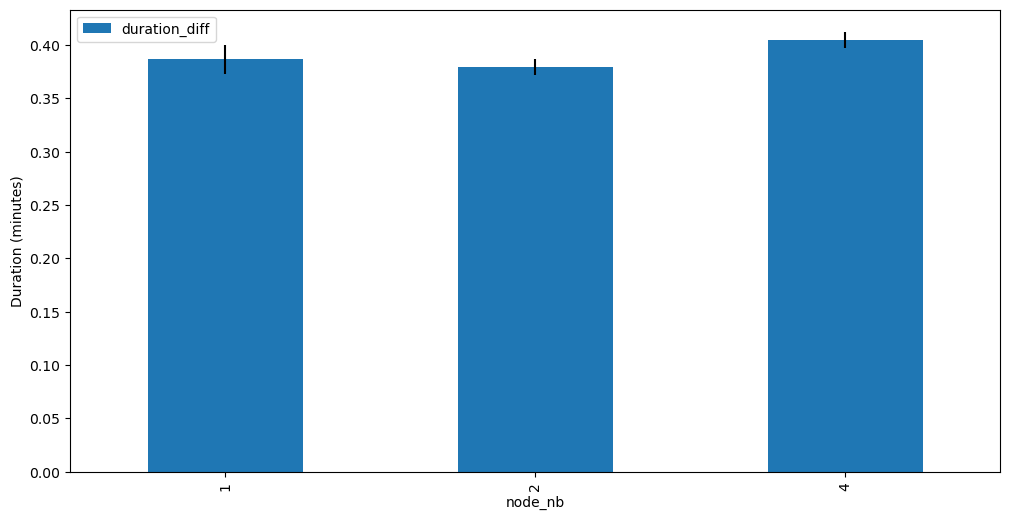

In [ ]:
plot_df = jobs[(jobs["sub_target-acc"]==0.72)&(jobs["sub_num-sample"]==14000000)]

plot_df["duration_diff"] = plot_df["duration_srun"] - plot_df["duration_block_minutes"]

fig, ax = plt.subplots(figsize=(12,6))
les_y = ["duration_diff"]
group = plot_df.groupby("node_nb")[les_y]
group.mean().plot(
    ax=ax,
    # x="node_nb", 
    y=les_y,
    yerr=group.std()[les_y],
    kind="bar"
    )
ax.set_ylabel("Duration (minutes)")
print(plot_df[les_y].mean())

As opposed to what we assumed before, the pre-processing is not significantly longer when the number of nodes increases.

# MLLOGS

In [12]:
list(jobs.job)

[126519,
 126520,
 126521,
 126522,
 126523,
 126524,
 126525,
 126526,
 126527,
 126528,
 126529,
 126530,
 126531]

In [18]:
plot_df = jobs[(jobs["job"]==126521)]

file = plot_df.file.values[0]
file.split("/")[-2:]

log_file = path + "/".join(file.split("/")[-2:])
print(log_file)


/Users/mathildepro/Documents/code_projects/hpe_logs/resultats_nov/unet/126521/231107205433997508655_1.log


In [19]:

import sys
sys.path.append("../../../logging/mlperf_logging/")
from compliance_checker.mlp_parser import parse_file
loglines, _ = parse_file(log_file, ruleset="2.1.0")
mllog = pd.DataFrame(loglines)
mllog

,full_string,timestamp,key,value,lineno
0,":::MLLOG {""...",1.699387e+12,cache_clear,{'value': T...,0
1,":::MLLOG {""...",1.699387e+12,init_start,{'value': N...,1
2,":::MLLOG {""...",1.699387e+12,submission_...,{'value': '...,2
3,":::MLLOG {""...",1.699387e+12,submission_org,{'value': '...,3
4,":::MLLOG {""...",1.699387e+12,submission_...,{'value': '...,4
...,...,...,...,...,...
1401,":::MLLOG {""...",1.699390e+12,block_stop,{'value': N...,1401
1402,":::MLLOG {""...",1.699390e+12,block_start,{'value': N...,1402
1403,":::MLLOG {""...",1.699390e+12,throughput,{'value': 2...,1403
1404,":::MLLOG {""...",1.699390e+12,current_lr,{'value': 2...,1404


In [20]:
def get_value(row):
    """Get key value pairs from mllog rows."""
    for key, value in row['metadata'].items():
        row["meta_"+key] = value
    return row

mllog['metadata'] = mllog.apply(lambda row: row['value']['metadata'], axis=1)
mllog['value'] = mllog.apply(lambda row: row['value']['value'], axis=1)
mllog = mllog.apply(get_value, axis=1)


In [21]:
mllog[-20:]

,full_string,key,lineno,meta_epoch,meta_epoch_count,meta_epoch_num,meta_file,meta_first_epoch_num,meta_lineno,meta_status,meta_step,meta_tensor,metadata,timestamp,value
1386,":::MLLOG {""...",throughput,1386,NaN,NaN,NaN,/workspace/...,NaN,94,NaN,NaN,NaN,{'file': '/...,1.699390e+12,291.854301
1387,":::MLLOG {""...",current_lr,1387,NaN,NaN,NaN,/workspace/...,NaN,95,NaN,NaN,NaN,{'file': '/...,1.699390e+12,2.0
1388,":::MLLOG {""...",tracked_stats,1388,NaN,NaN,NaN,/workspace/...,NaN,96,NaN,3640.0,NaN,{'file': '/...,1.699390e+12,{'throughpu...
1389,":::MLLOG {""...",eval_start,1389,NaN,NaN,3660.0,/workspace/...,NaN,120,NaN,NaN,NaN,{'file': '/...,1.699390e+12,3660
1390,":::MLLOG {""...",eval_accuracy,1390,NaN,NaN,3660.0,/workspace/...,NaN,123,NaN,NaN,NaN,{'file': '/...,1.699390e+12,0.898355
1391,":::MLLOG {""...",eval_stop,1391,NaN,NaN,3660.0,/workspace/...,NaN,128,NaN,NaN,NaN,{'file': '/...,1.699390e+12,3660
1392,":::MLLOG {""...",block_stop,1392,NaN,20.0,NaN,/workspace/...,3660.0,145,NaN,NaN,NaN,{'file': '/...,1.699390e+12,None
1393,":::MLLOG {""...",block_start,1393,NaN,20.0,NaN,/workspace/...,3660.0,52,NaN,NaN,NaN,{'file': '/...,1.699390e+12,None
1394,":::MLLOG {""...",throughput,1394,NaN,NaN,NaN,/workspace/...,NaN,94,NaN,NaN,NaN,{'file': '/...,1.699390e+12,291.901822
1395,":::MLLOG {""...",current_lr,1395,NaN,NaN,NaN,/workspace/...,NaN,95,NaN,NaN,NaN,{'file': '/...,1.699390e+12,2.0


<Axes: xlabel='timestamp'>

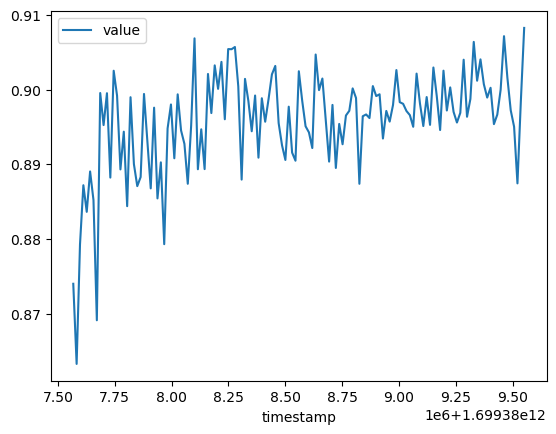

In [22]:
mllog[mllog["key"]=="eval_accuracy"][["timestamp", "value"]].plot(x="timestamp", y="value")